### Load all the liberaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data set

In [3]:
data = pd.read_csv(r"D:\Data_analytics_new\Sub5_Machine_Learning\Credit-Card-Fraud-Detection-Model1\data\cleaned_data\train_raw1.csv")

In [4]:
data.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [5]:
data.head(2)

,trans_num,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,is_fraud
0,0b242abb623afc578575680df30655b9,2019-01-01,12AM-6AM,CN - 2703186189652095,less than 5 dollar,misc_net,F,NC,0.068,0.870,Medium_pop,31,0
1,1f76529f8574734946361c461b024d99,2019-01-01,12AM-6AM,CN - 630423337322,b/w 80 to 150 dollar,grocery_pos,F,WA,0.271,0.024,Low_pop,41,0


### Multivariate Analysis

1. Time bucket vs Fraud

In [6]:
fraud_by_time = data.groupby(['time_bucket','is_fraud']).size().unstack(fill_value=0)
print(fraud_by_time)

## percentage analysis
total_cases = data.groupby('time_bucket').size()
fraud_perc = (data[data["is_fraud"]==1].groupby('time_bucket').size()/total_cases) * 100
print(fraud_perc)

is_fraud          0     1
time_bucket              
12AM-6AM     252197  2633
12PM-6PM     391557   466
6AM-12PM     253272   274
6PM-12AM     392143  4133
time_bucket
12AM-6AM    1.033238
12PM-6PM    0.118871
6AM-12PM    0.108067
6PM-12AM    1.042960
dtype: float64


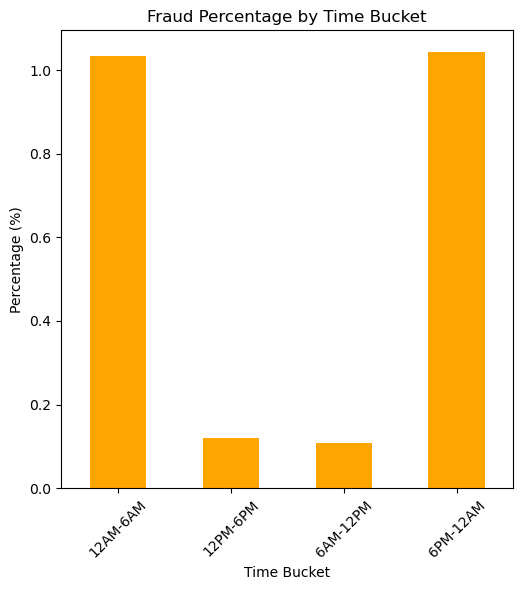

In [7]:
### Maximum Fraud Transactons occurs at time bucket of 12 AM - 6 AM and 6 PM - 12 AM

### Visualization

plt.figure(figsize=(10,6))

# Bar plot for percentages
plt.subplot(1, 2, 2)
fraud_perc.plot(kind='bar', color='orange')
plt.title('Fraud Percentage by Time Bucket')
plt.xlabel('Time Bucket')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

(array([0, 1, 2, 3]),
 [Text(0, 0, '12AM-6AM'),
  Text(1, 0, '6AM-12PM'),
  Text(2, 0, '12PM-6PM'),
  Text(3, 0, '6PM-12AM')])

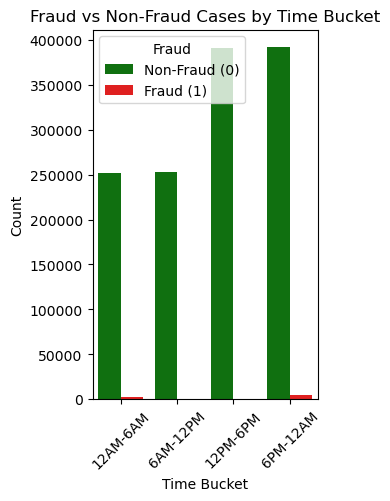

In [8]:
# Bar plot for counts
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='time_bucket', hue='is_fraud', palette={0: 'green', 1: 'red'})
plt.title('Fraud vs Non-Fraud Cases by Time Bucket')
plt.xlabel('Time Bucket')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)

In [9]:
data.head(2)

,trans_num,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,is_fraud
0,0b242abb623afc578575680df30655b9,2019-01-01,12AM-6AM,CN - 2703186189652095,less than 5 dollar,misc_net,F,NC,0.068,0.870,Medium_pop,31,0
1,1f76529f8574734946361c461b024d99,2019-01-01,12AM-6AM,CN - 630423337322,b/w 80 to 150 dollar,grocery_pos,F,WA,0.271,0.024,Low_pop,41,0


2. amount vs Fraud

is_fraud                   0     1
amount_bkt                        
b/w 10 to 40 dollar   245420  1036
b/w 40 to 60 dollar   186547    85
b/w 5 to 10 dollar    172874   500
b/w 60 to 80 dollar   181879     0
b/w 80 to 150 dollar  238415   151
less than 5 dollar    162530    25
more than 150 dollar  101504  5709
amount_bkt
b/w 10 to 40 dollar     0.420359
b/w 40 to 60 dollar     0.045544
b/w 5 to 10 dollar      0.288394
b/w 60 to 80 dollar          NaN
b/w 80 to 150 dollar    0.063295
less than 5 dollar      0.015379
more than 150 dollar    5.324914
dtype: float64


c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'less than 5 dollar'),
  Text(1, 0, 'b/w 80 to 150 dollar'),
  Text(2, 0, 'more than 150 dollar'),
  Text(3, 0, 'b/w 40 to 60 dollar'),
  Text(4, 0, 'b/w 60 to 80 dollar'),
  Text(5, 0, 'b/w 10 to 40 dollar'),
  Text(6, 0, 'b/w 5 to 10 dollar')])

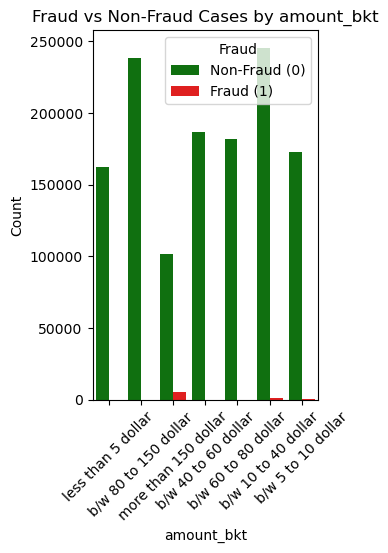

In [10]:
fraud_amt = data.groupby(['amount_bkt','is_fraud']).size().unstack(fill_value=0)
print(fraud_amt)

## percentage analysis
total_cases = data.groupby('amount_bkt').size()
fraud_perc = (data[data["is_fraud"]==1].groupby('amount_bkt').size()/total_cases) * 100
print(fraud_perc)

# Bar plot for counts
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='amount_bkt', hue='is_fraud', palette={0: 'green', 1: 'red'})
plt.title('Fraud vs Non-Fraud Cases by amount_bkt')
plt.xlabel('amount_bkt')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)

In [11]:
### The highest number of fraud occure when amount in the "more than 150 dollar" and "b/w 10 to 40 dollar"



3. Transactions Category vs Fraud

is_fraud             0     1
category                    
entertainment    93781   233
food_dining      91310   151
gas_transport   131041   618
grocery_net      45318   134
grocery_pos     121895  1743
health_fitness   85746   133
home            122917   198
kids_pets       112796   239
misc_net         62372   915
misc_pos         79405   250
personal_care    90538   220
shopping_net     95830  1713
shopping_pos    115829   843
travel           40391   116
category
entertainment     0.247835
food_dining       0.165098
gas_transport     0.469394
grocery_net       0.294817
grocery_pos       1.409761
health_fitness    0.154869
home              0.160825
kids_pets         0.211439
misc_net          1.445795
misc_pos          0.313853
personal_care     0.242403
shopping_net      1.756149
shopping_pos      0.722538
travel            0.286370
dtype: float64


c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'misc_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'entertainment'),
  Text(3, 0, 'gas_transport'),
  Text(4, 0, 'misc_pos'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'shopping_net'),
  Text(7, 0, 'shopping_pos'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'personal_care'),
  Text(10, 0, 'health_fitness'),
  Text(11, 0, 'travel'),
  Text(12, 0, 'kids_pets'),
  Text(13, 0, 'home')])

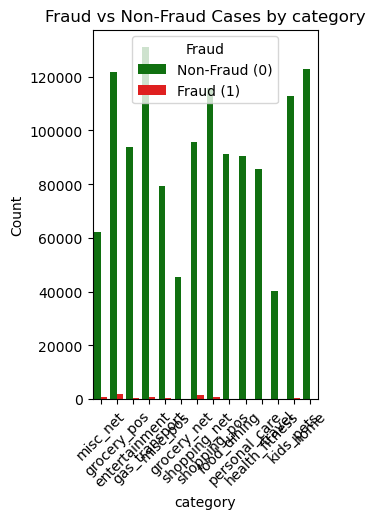

In [12]:
fraud_amt = data.groupby(['category','is_fraud']).size().unstack(fill_value=0)
print(fraud_amt)

## percentage analysis
total_cases = data.groupby('category').size()
fraud_perc = (data[data["is_fraud"]==1].groupby('category').size()/total_cases) * 100
print(fraud_perc)

# Bar plot for counts
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='category', hue='is_fraud', palette={0: 'green', 1: 'red'})
plt.title('Fraud vs Non-Fraud Cases by category')
plt.xlabel('category')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)

In [13]:
data["category"].nunique()

14

4. Gender Vs Fraud

is_fraud       0     1
gender                
F         706128  3735
M         583041  3771
gender
F    0.526158
M    0.642625
dtype: float64


c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

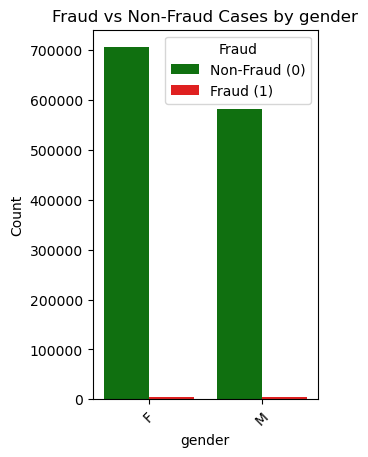

In [14]:
fraud_amt = data.groupby(['gender','is_fraud']).size().unstack(fill_value=0)
print(fraud_amt)

## percentage analysis
total_cases = data.groupby('gender').size()
fraud_perc = (data[data["is_fraud"]==1].groupby('gender').size()/total_cases) * 100
print(fraud_perc)

# Bar plot for counts
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='gender', hue='is_fraud', palette={0: 'green', 1: 'red'})
plt.title('Fraud vs Non-Fraud Cases by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)

In [15]:
data.head(2)

,trans_num,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,is_fraud
0,0b242abb623afc578575680df30655b9,2019-01-01,12AM-6AM,CN - 2703186189652095,less than 5 dollar,misc_net,F,NC,0.068,0.870,Medium_pop,31,0
1,1f76529f8574734946361c461b024d99,2019-01-01,12AM-6AM,CN - 630423337322,b/w 80 to 150 dollar,grocery_pos,F,WA,0.271,0.024,Low_pop,41,0


In [16]:
data["state"].nunique()

51

5. population bkt vs fraud

is_fraud             0     1
population_bkt              
High_pop        386722  2342
Low_pop         395756  2299
Medium_pop      506691  2865
population_bkt
High_pop      0.601958
Low_pop       0.577558
Medium_pop    0.562254
dtype: float64


c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

(array([0, 1, 2]),
 [Text(0, 0, 'Medium_pop'), Text(1, 0, 'Low_pop'), Text(2, 0, 'High_pop')])

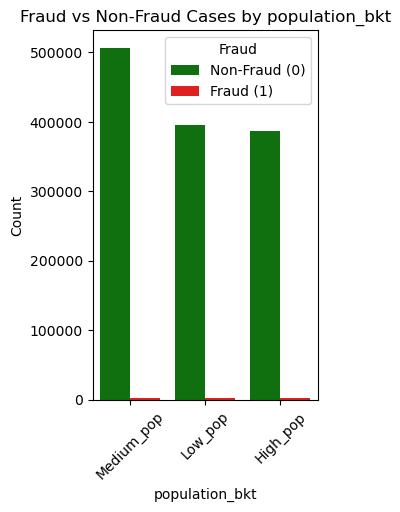

In [17]:
fraud_amt = data.groupby(['population_bkt','is_fraud']).size().unstack(fill_value=0)
print(fraud_amt)

## percentage analysis
total_cases = data.groupby('population_bkt').size()
fraud_perc = (data[data["is_fraud"]==1].groupby('population_bkt').size()/total_cases) * 100
print(fraud_perc)

# Bar plot for counts
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='population_bkt', hue='is_fraud', palette={0: 'green', 1: 'red'})
plt.title('Fraud vs Non-Fraud Cases by population_bkt')
plt.xlabel('population_bkt')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)

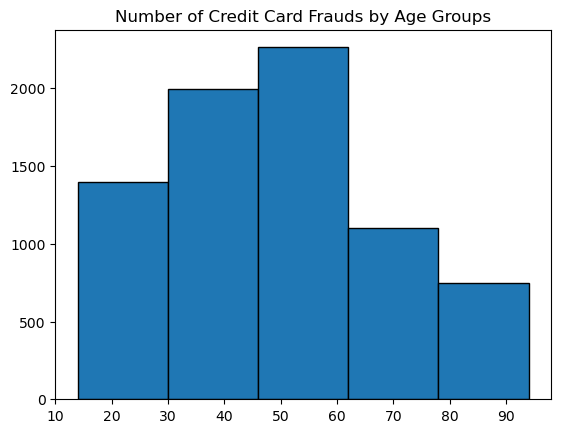

In [18]:
fraud=data[data["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 5)
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

In [19]:
data.head(2)

,trans_num,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,is_fraud
0,0b242abb623afc578575680df30655b9,2019-01-01,12AM-6AM,CN - 2703186189652095,less than 5 dollar,misc_net,F,NC,0.068,0.870,Medium_pop,31,0
1,1f76529f8574734946361c461b024d99,2019-01-01,12AM-6AM,CN - 630423337322,b/w 80 to 150 dollar,grocery_pos,F,WA,0.271,0.024,Low_pop,41,0


In [20]:
### bucketization of age
data.describe()

,latitudinal_distance,longitudinal_distance,age,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,5.002626e-01,5.003366e-01,4.599746e+01,5.788652e-03
std,2.885700e-01,2.888704e-01,1.739607e+01,7.586269e-02
min,0.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00
25%,2.500000e-01,2.500000e-01,3.300000e+01,0.000000e+00
50%,5.010000e-01,5.000000e-01,4.400000e+01,0.000000e+00
75%,7.500000e-01,7.510000e-01,5.700000e+01,0.000000e+00
max,1.000000e+00,1.000000e+00,9.600000e+01,1.000000e+00


In [21]:
def age_bkt(x):
    if x<=25:
        return "less than 25"
    elif 25<x<=40:
        return "b/w 25 to 40"
    elif 40<x<=60:
        return "b/w 40 to 60"
    else:
        return "more than 60"
    
data["age_bkt"] = data["age"].apply(lambda x: age_bkt(x))

In [22]:
data.head(2)

,trans_num,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,is_fraud,age_bkt
0,0b242abb623afc578575680df30655b9,2019-01-01,12AM-6AM,CN - 2703186189652095,less than 5 dollar,misc_net,F,NC,0.068,0.870,Medium_pop,31,0,b/w 25 to 40
1,1f76529f8574734946361c461b024d99,2019-01-01,12AM-6AM,CN - 630423337322,b/w 80 to 150 dollar,grocery_pos,F,WA,0.271,0.024,Low_pop,41,0,b/w 40 to 60


is_fraud           0     1
age_bkt                   
b/w 25 to 40  412082  1923
b/w 40 to 60  485665  2799
less than 25  130712   838
more than 60  260710  1946
age_bkt
b/w 25 to 40    0.464487
b/w 40 to 60    0.573021
less than 25    0.637020
more than 60    0.740893
dtype: float64


c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Oliver\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

(array([0, 1, 2, 3]),
 [Text(0, 0, 'b/w 25 to 40'),
  Text(1, 0, 'b/w 40 to 60'),
  Text(2, 0, 'less than 25'),
  Text(3, 0, 'more than 60')])

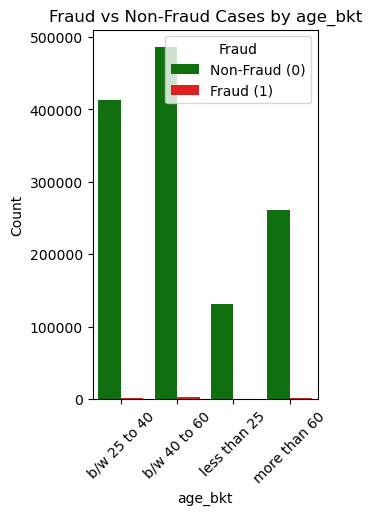

In [23]:
fraud_amt = data.groupby(['age_bkt','is_fraud']).size().unstack(fill_value=0)
print(fraud_amt)

## percentage analysis
total_cases = data.groupby('age_bkt').size()
fraud_perc = (data[data["is_fraud"]==1].groupby('age_bkt').size()/total_cases) * 100
print(fraud_perc)

# Bar plot for counts
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='age_bkt', hue='is_fraud', palette={0: 'green', 1: 'red'})
plt.title('Fraud vs Non-Fraud Cases by age_bkt')
plt.xlabel('age_bkt')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)

In [24]:
data.head()

,trans_num,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,is_fraud,age_bkt
0,0b242abb623afc578575680df30655b9,2019-01-01,12AM-6AM,CN - 2703186189652095,less than 5 dollar,misc_net,F,NC,0.068,0.870,Medium_pop,31,0,b/w 25 to 40
1,1f76529f8574734946361c461b024d99,2019-01-01,12AM-6AM,CN - 630423337322,b/w 80 to 150 dollar,grocery_pos,F,WA,0.271,0.024,Low_pop,41,0,b/w 40 to 60
2,a1a22d70485983eac12b5b88dad1cf95,2019-01-01,12AM-6AM,CN - 38859492057661,more than 150 dollar,entertainment,M,ID,0.970,0.108,Medium_pop,57,0,b/w 40 to 60
3,6b849c168bdad6f867558c3793159a81,2019-01-01,12AM-6AM,CN - 3534093764340240,b/w 40 to 60 dollar,gas_transport,M,MT,0.804,0.447,Medium_pop,52,0,b/w 40 to 60
4,a41d7549acf90789359a9aa5346dcb46,2019-01-01,12AM-6AM,CN - 375534208663984,b/w 40 to 60 dollar,misc_pos,M,VA,0.254,0.830,Low_pop,33,0,b/w 25 to 40


### Feature Importance

In [25]:
data["is_fraud"].value_counts(normalize=True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

##### Chi Square Test

In [26]:
#!pip install scipy

In [27]:
from scipy.stats import chi2_contingency

In [33]:

def chi_square_test(df, categorical_cols, target_col='is_fraud', alpha=0.05):
    
    results = []
    
    for col in categorical_cols:
        # Create contingency table
        contingency_table = pd.crosstab(df[col], df[target_col])
        
        # Perform Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Determine if result is significant
        significant = p <= alpha
        
        # Calculate Cramer's V (effect size)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        
        results.append({
            'Feature': col,
            'Chi-Square': chi2,
            'p-value': p,
            'Degrees of Freedom': dof,
            'Significant': significant,
            "Cramer's V": cramers_v
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Display results
    print("Chi-Square Test Results:")
    display(results_df)
    
    return results_df




In [34]:

# Specify your categorical columns and target
categorical_columns = ['time_bucket', 'amount_bkt',
       'category', 'gender', 'population_bkt',
       'age_bkt']
target_column = 'is_fraud'

# Run the analysis
chi_results = chi_square_test(data, categorical_columns, target_column)

Chi-Square Test Results:


,Feature,Chi-Square,p-value,Degrees of Freedom,Significant,Cramer's V
0,time_bucket,4815.016276,0.000000e+00,3,True,0.060937
1,amount_bkt,46303.754281,0.000000e+00,6,True,0.188970
2,category,6486.003270,0.000000e+00,13,True,0.070725
3,gender,75.514566,3.627211e-18,1,True,0.007631
4,population_bkt,6.059791,4.832070e-02,2,True,0.002162
5,age_bkt,221.945012,7.625344e-48,3,True,0.013083


In [35]:
data.columns

Index(['trans_num', 'trans_date', 'time_bucket', 'cc_num', 'amount_bkt',
       'category', 'gender', 'state', 'latitudinal_distance',
       'longitudinal_distance', 'population_bkt', 'age', 'is_fraud',
       'age_bkt'],
      dtype='object')

In [36]:
data.to_csv("..//data//cleaned_data//train_raw2.csv")